# FordGoBike Data Exploration
## by Jing Lu

## Preliminary Wrangling

> This document explores Ford GoBike's trip data containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [634]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [635]:
# merge 12 months' trip data into one for year 2018
import os
import fnmatch

files = []
cwd = os.getcwd()
for dirpath, dirnames, filenames in os.walk(cwd):
    for filename in filenames:
        file = os.path.join(dirpath, filename)
        if fnmatch.fnmatch(file, '*.csv'):
                files.append(file)
                
df_2018 = pd.concat([ pd.read_csv(file) for file in files] )
df_2018.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [636]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 241.7+ MB


In [637]:
df_2018.shape[0]

1863721

> Per http://pandas.pydata.org/pandas-docs/stable/whatsnew.html#output-formatting-enhancements: Non-null count for very large dataframes can be quite expensive. So dataframes with more rows than specified in pd.options.display.max_info_rows will only show the dtypes and not the counts. The default value for that is 1690785.

> The dataset is too big and consumes too much CPU and memory ... Juypter notebook gets stuck pretty often and hence, I decide to 
1. Drop columns which I am not interested in or don't help to answer questions I have
2. Drop rows which contain missing values 

> I don't quite understand what the variable *bike_share_for_all_trip* is used for. I contacted Ford GoBike's customer support for clarification and didn't get any response. Drop it.

In [638]:
df_2018.drop('bike_share_for_all_trip', axis = 1, inplace = True)

> No interest in latitude and longitude of stations - it's enough to have stations' names. Drop *start_station_latitude*, *start_station_longitude*, *end_station_latitude*, *end_station_longitude*. 

In [639]:
df_2018.drop(['start_station_longitude', 'start_station_latitude', 'end_station_latitude', 'end_station_longitude'], axis = 1, inplace = True)

> Any missing data in *start_station_name* and *end_station_name* ?

In [640]:
(df_2018.start_station_name.isnull()).sum(), (df_2018.end_station_name.isnull()).sum()

(11771, 11771)

> Are those missing values belong to the same samples?

In [641]:
(df_2018.start_station_name.isnull() & df_2018.end_station_name.isnull()).sum()

11771

<font color = 'blue'>Note</font>: I believe that there must be a way to figure out those stations' names based on their longitude and latitude. It is out of scope of this project.

> Any missing value in *duration_sec*, *start_time*, *end_time* ?

In [642]:
(df_2018.duration_sec.isnull()).sum(), (df_2018.start_time.isnull()).sum(), (df_2018.end_time.isnull()).sum()

(0, 0, 0)

> Any missing data in *bike_id* ?

In [643]:
(df_2018.bike_id.isnull()).sum()

0

> Any missing data in *user_type*?

In [644]:
(df_2018.user_type.isnull()).sum()

0

> Any missing data in *member_birth_year* ?

In [645]:
(df_2018.member_birth_year.isnull()).sum()

110718

> Any missing data in *member_gender* ?

In [646]:
(df_2018.member_gender.isnull()).sum()

110367

> We have 110718 rows which have at least one NA - about 6% of 1863621 rows. Drop them.

In [647]:
df_2018.dropna(inplace = True)

> Any duplicates?

In [648]:
(df_2018.duplicated()).sum()

0

> Now, let's take a close look at the dataset

In [649]:
df_2018.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
20769,205,2018-07-28 13:43:50.9810,2018-07-28 13:47:16.4120,59.0,S Van Ness Ave at Market St,75.0,Market St at Franklin St,3623,Subscriber,1992.0,Female
109499,474,2018-05-12 15:40:48.9800,2018-05-12 15:48:43.6200,132.0,24th St at Chattanooga St,147.0,29th St at Tiffany Ave,4066,Subscriber,1967.0,Male
96689,923,2018-09-15 17:59:53.1070,2018-09-15 18:15:16.8080,6.0,The Embarcadero at Sansome St,3.0,Powell St BART Station (Market St at 4th St),600,Subscriber,1982.0,Female
48010,1029,2018-10-24 12:12:55.3840,2018-10-24 12:30:04.7520,93.0,4th St at Mission Bay Blvd S,42.0,San Francisco City Hall (Polk St at Grove St),2426,Customer,1972.0,Male
88893,496,2018-08-17 09:10:08.6720,2018-08-17 09:18:24.9060,126.0,Esprit Park,66.0,3rd St at Townsend St,1150,Subscriber,1988.0,Female
24911,947,2018-04-26 05:42:52.3700,2018-04-26 05:58:40.0070,188.0,Dover St at 57th St,7.0,Frank H Ogawa Plaza,843,Subscriber,1982.0,Male
86607,333,2018-11-08 11:51:45.5740,2018-11-08 11:57:19.1180,100.0,Bryant St at 15th St,60.0,8th St at Ringold St,920,Subscriber,1993.0,Male
9683,791,2018-03-29 16:46:02.4800,2018-03-29 16:59:14.1050,181.0,Grand Ave at Webster St,212.0,Mosswood Park,2573,Subscriber,1987.0,Male
115578,245,2018-07-14 13:31:29.7700,2018-07-14 13:35:35.5940,95.0,Sanchez St at 15th St,109.0,17th St at Valencia St,3961,Subscriber,1988.0,Female
158199,200,2018-09-06 13:02:58.4020,2018-09-06 13:06:19.0910,215.0,34th St at Telegraph Ave,176.0,MacArthur BART Station,476,Subscriber,1980.0,Male


In [650]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 131361
Data columns (total 11 columns):
duration_sec          int64
start_time            object
end_time              object
start_station_id      float64
start_station_name    object
end_station_id        float64
end_station_name      object
bike_id               int64
user_type             object
member_birth_year     float64
member_gender         object
dtypes: float64(3), int64(2), object(6)
memory usage: 159.4+ MB


In [651]:
df_2018.user_type.value_counts()

Subscriber    1542367
Customer       199189
Name: user_type, dtype: int64

In [652]:
df_2018.member_gender.value_counts()

Male      1279545
Female     435010
Other       27001
Name: member_gender, dtype: int64

### Assess
> 1. start_time and end_time is string instead of datetime
2. start_station_id and end_station_id is float instead of integer
3. user_type is string instead of category
4. member_birth_year is float instead of integer
5. member_gender is string instead of category
6. column name of 'member_birth_year' and 'member_gender' are misleading. I checked with Ford GoBike and confirmed that they are meant to be for both members and customers.

### Clean
> Next, clean the dataset based on the above inital **Assess**

In [653]:
# convert start_time and end_time to datetime
df_2018.start_time = pd.to_datetime(df_2018.start_time)
df_2018.end_time = pd.to_datetime(df_2018.end_time)

In [654]:
df_2018.sample(10)[['start_time', 'end_time']]

,start_time,end_time
176257,2018-06-04 14:43:31.518,2018-06-04 14:57:37.628
56445,2018-09-21 17:31:15.083,2018-09-21 17:38:03.231
147017,2018-09-07 21:27:16.867,2018-09-07 21:31:57.316
49715,2018-10-24 08:45:53.319,2018-10-24 08:56:23.849
180829,2018-10-03 18:13:06.922,2018-10-03 18:20:27.427
64658,2018-07-22 10:10:21.858,2018-07-22 10:20:11.485
35455,2018-01-22 16:09:00.953,2018-01-22 16:25:21.196
48615,2018-10-24 10:17:50.591,2018-10-24 10:26:03.017
87101,2018-08-17 14:41:03.985,2018-08-17 14:46:03.836
119424,2018-12-04 08:07:52.171,2018-12-04 08:22:26.673


In [655]:
# convert start_station_id and end_station_id to integer
df_2018.start_station_id = df_2018.start_station_id.astype('int')
df_2018.end_station_id = df_2018.end_station_id.astype('int')

In [656]:
# convert user_type to categorical
df_2018.user_type = df_2018.user_type.astype('category')

In [657]:
# convert member_gender to categorical 
df_2018.member_gender = df_2018.member_gender.astype('category')

In [658]:
# convert member_birth_year to integer
df_2018.member_birth_year = df_2018.member_birth_year.astype('int')

In [659]:
# rename member_birth_year and member_gender to user_birth_year and user_gender
df_2018.rename(index=str, columns={"member_birth_year":"user_birth_year", "member_gender":"user_gender"}, inplace = True)

In [660]:
df_2018.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,user_birth_year,user_gender
13133,108,2018-05-30 07:54:03.037,2018-05-30 07:55:51.655,66,3rd St at Townsend St,66,3rd St at Townsend St,512,Subscriber,1961,Female
68510,734,2018-02-09 17:42:01.378,2018-02-09 17:54:15.691,41,Golden Gate Ave at Polk St,20,Mechanics Monument Plaza (Market St at Bush St),3040,Subscriber,1995,Male
22026,104,2018-04-26 15:10:30.816,2018-04-26 15:12:14.978,36,Folsom St at 3rd St,37,2nd St at Folsom St,3882,Subscriber,1974,Male
123544,593,2018-09-11 20:52:37.724,2018-09-11 21:02:30.973,89,Division St at Potrero Ave,126,Esprit Park,2403,Subscriber,1984,Male
54999,917,2018-06-22 17:30:59.718,2018-06-22 17:46:17.598,5,Powell St BART Station (Market St at 5th St),114,Rhode Island St at 17th St,4012,Subscriber,1997,Male
95356,1077,2018-12-08 19:14:33.458,2018-12-08 19:32:30.459,96,Dolores St at 15th St,67,San Francisco Caltrain Station 2 (Townsend St...,3579,Subscriber,1987,Male
171015,5262,2018-09-04 16:21:42.728,2018-09-04 17:49:25.628,47,4th St at Harrison St,47,4th St at Harrison St,3337,Customer,1980,Male
64540,345,2018-05-20 18:57:29.885,2018-05-20 19:03:15.717,144,Precita Park,134,Valencia St at 24th St,4048,Customer,1985,Male
93443,199,2018-05-15 17:51:01.671,2018-05-15 17:54:21.021,79,7th St at Brannan St,61,Howard St at 8th St,3341,Subscriber,1981,Male
182561,3501,2018-09-02 08:25:06.548,2018-09-02 09:23:27.592,15,San Francisco Ferry Building (Harry Bridges Pl...,28,The Embarcadero at Bryant St,3345,Customer,1991,Male


In [661]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1741556 entries, 0 to 131361
Data columns (total 11 columns):
duration_sec          int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_id      int32
start_station_name    object
end_station_id        int32
end_station_name      object
bike_id               int64
user_type             category
user_birth_year       int32
user_gender           category
dtypes: category(2), datetime64[ns](2), int32(3), int64(2), object(2)
memory usage: 116.3+ MB


In [662]:
df_2018.shape[0]

1741556

### What is the structure of your dataset?

> The original dataset has 16 columns and 1863721 rows. After cleaning (drop rows which contain at least one NA, columns which are not of interest), it now has 11 columns and 1741556 rows.

> The dataset (after data wrangling) contains the following information 
1. users
    1. user_type: Customer and Subscriber
    2. user_gender: Male, Female and Other
    3. user_birth_year
2. trips
    1. start_time, end_time, duration_sec
    2. start_station_id, start_station_name, end_station_id, end_station_name
    3. bike_id

### What is/are the main feature(s) of interest in your dataset?

> I would like to find out
1. How does the distribution of trip duration look like ?
2. How user activity level varies during a day, within a week and across months ?
3. What are most popular trips ?
4. Do the above vary across different groups of users (in terms of gender, age and type) ?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. For question 1: start_time and end_time
2. For question 2: start_time and end_time 
3. For question 3: start_station_id and end_station_id
4. For question 4: user_type, user_birth_year, user_gender in addition to features for each of above 3 questions

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [663]:
basecolor = sb.color_palette()[0]

### How does the distribution of trip duration look like ?

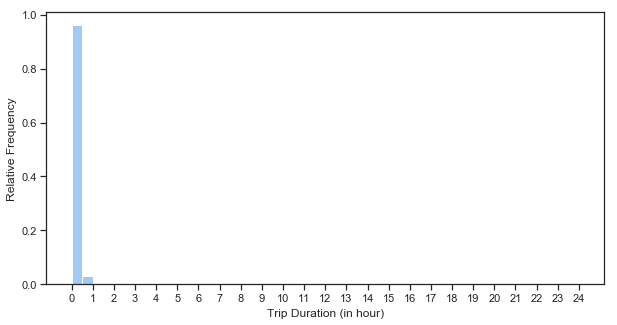

In [664]:
xbins = np.arange(0, df_2018.duration_sec.max()/3600 + 0.5, 0.5)
xticks = np.arange(0, df_2018.duration_sec.max()/3600 + 1, 1)
((df_2018.duration_sec)/3600).hist(figsize = [10, 5], bins = xbins, weights = np.zeros_like(df_2018.duration_sec) + 1/df_2018.duration_sec.size, grid = False, edgecolor = 'white')
plt.xlabel('Trip Duration (in hour)')
plt.xticks(xticks)
plt.ylabel('Relative Frequency');

> Most of trips are within 60 minutes. Let's check how the distribution looks like by taking logarithm of duration.

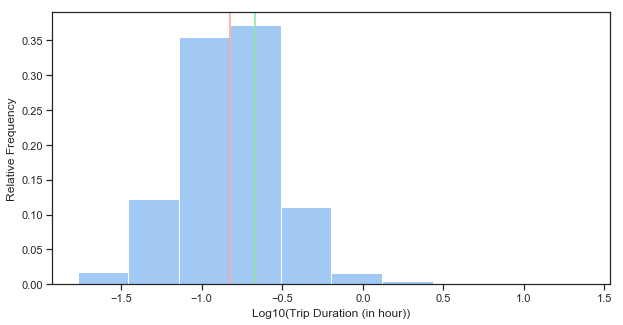

In [665]:
# Let's check how the distribution looks like by taking logarithm of duration in minutes
(np.log10(df_2018.duration_sec/3600)).hist(figsize = [10, 5], weights = np.zeros_like(df_2018.duration_sec) + 1/df_2018.duration_sec.size, grid = False, edgecolor = 'white')
plt.axvline(np.log10(df_2018.duration_sec.mean()/3600), color = 'g', label = 'mean')
plt.axvline(np.log10(df_2018.duration_sec.median()/3600), color = 'r', label = 'median');
plt.xlabel('Log10(Trip Duration (in hour))')
plt.ylabel('Relative Frequency');

> By taking logarithm, trip duration is closer to nomral distribution. Let's zoom in and take a closer look at trips with duration within 60 minutes.

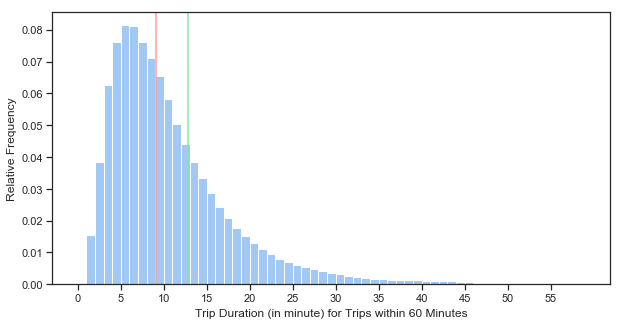

In [666]:
# trips with duration within 60 minutes
xbins = np.arange(0, 60, 1)
xticks = np.arange(0, 60, 5)
((df_2018.duration_sec)/60).hist(figsize = [10, 5], bins = xbins, grid = False, density = True, edgecolor='white')
plt.xlabel('Trip Duration (in minute) for Trips within 60 Minutes')
plt.xticks(xticks)
plt.ylabel('Relative Frequency');
plt.axvline(df_2018.duration_sec.mean()/60, color = 'g', label = 'mean')
plt.axvline(df_2018.duration_sec.median()/60, color = 'r', label = 'median');

> How many trips are longer than 60 minutes and how long is the longest trip ?

In [667]:
(df_2018.duration_sec/3600 > 1).sum(), '{:.2f}'.format((df_2018.duration_sec/3600).max())

(18997, '23.97')

> Total of 18997 trips are longer than 1 hour with the maximum of around 24 hours.

> As of now, the distribution of trip duration on entire dataset is explored. Later on, I'll check if the distribution varies across different groups of users (in terms of type/gender/age).

### How user activity level varies during a day, within a week or across months ?

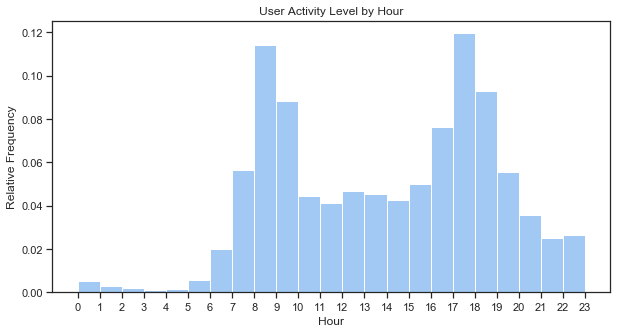

In [668]:
bins = np.arange(0, 24, 1)
df_2018.start_time.dt.hour.plot(kind = 'hist', figsize = [10, 5], bins = bins, density = True, grid = False, edgecolor = 'white')
plt.xlabel('Hour')
plt.xticks(bins);
plt.ylabel('Relative Frequency')
plt.title('User Activity Level by Hour');

> Users are most active in 8:00 - 9:00, 17:00 - 18:00, followed by 9:00AM - 10:00AM, 18:00 - 19:00, and then 16:00 - 17:00 - those are rush hours.

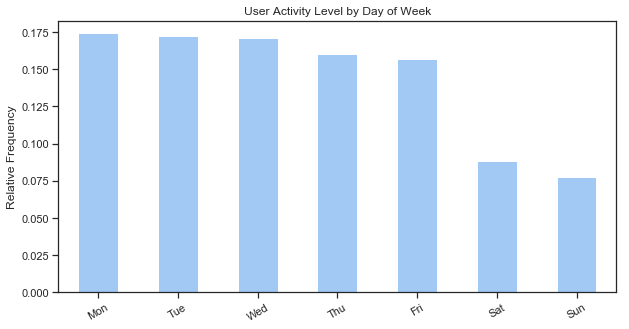

In [669]:
(df_2018.start_time.dt.dayofweek.value_counts()/len(df_2018)).plot(kind = 'bar', figsize = [10, 5], rot = 30, color = basecolor)
locs, labels = plt.xticks()   
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(locs, labels)
plt.ylabel('Relative Frequency')
plt.title('User Activity Level by Day of Week');

> Users are more active on weekdays than weekends - this makes perfect sense!

Text(0.5, 1.0, 'User Activity Level by Month')

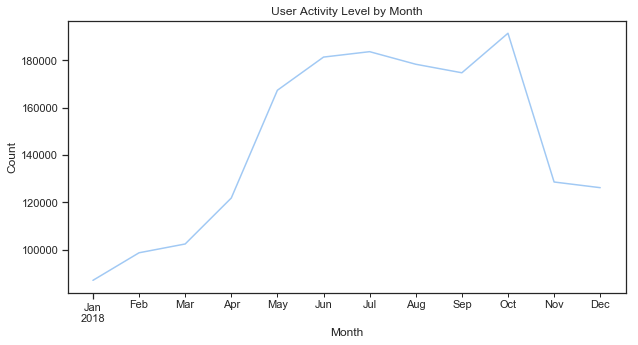

In [670]:
df_2018.groupby(df_2018.start_time.dt.to_period('M')).agg('count')['bike_id'].plot(kind = 'line', figsize = [10, 5])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('User Activity Level by Month')

> Activities increase when weather gets warmer, reach and keep at a stable level during summer, climb to the peak around Oct, and then decrease as weather turns colder - makes perfect sense too!

> As of now, the relationship between user activity level and time (in terms of hour of day, day of week, month of year) on entire dataset is explored. I wonder if the realtionship varies with different type of users (i.e., Subscriber vs Customer).

### What trips are most taken ?

> How to define a trip? By start station? By end station? Or by pair of start staion and end station? I start with pair of start station and end station. 

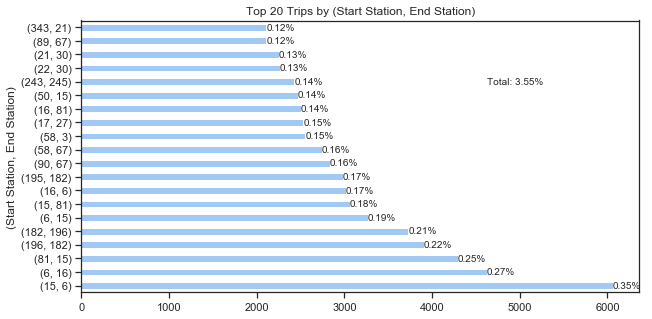

In [671]:
toptrips_by_start_end = df_2018.groupby(['start_station_id', 'end_station_id']).count().bike_id.sort_values(ascending = False).nlargest(20)
toptrips_by_start_end.plot(kind = 'barh', figsize = [10, 5], color = basecolor)
plt.ylabel('(Start Station, End Station)')
plt.title('Top 20 Trips by (Start Station, End Station)');
toptrips_by_start_end = toptrips_by_start_end.reset_index()
for i in range(len(toptrips_by_start_end)):
    text = "{:.2%}".format(toptrips_by_start_end.loc[i, 'bike_id']/len(df_2018))
    plt.text(toptrips_by_start_end.loc[i, 'bike_id'] + 1, i, text, va = 'center')
plt.text(toptrips_by_start_end.loc[1, 'bike_id'] + 1, 15, "Total: " + "{:.2%}".format(toptrips_by_start_end.bike_id.sum()/len(df_2018)), va = 'center');
    

> By defining a trip as a pair of start_station and end_station, the top 20 trips only count for 3.55% of total trips! Seems not a good idea. Let's check by start_station and end_station respectively.

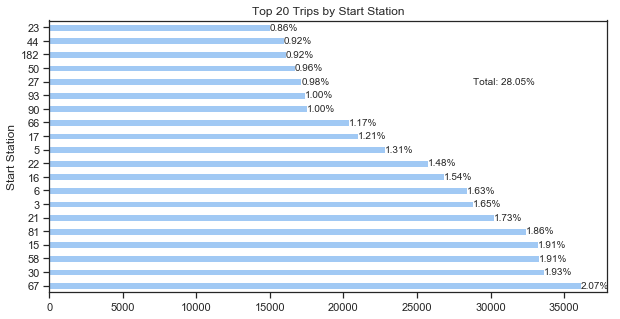

In [672]:
toptrips_by_start = df_2018.groupby(['start_station_id']).count().bike_id.sort_values(ascending = False).nlargest(20)
toptrips_by_start.plot(kind = 'barh', figsize = [10, 5], color = basecolor)
toptrips_by_start = toptrips_by_start.reset_index()
plt.ylabel('Start Station')
plt.title('Top 20 Trips by Start Station');
for i in range(len(toptrips_by_start)):
    text = "{:.2%}".format(toptrips_by_start.loc[i, 'bike_id']/len(df_2018))
    plt.text(toptrips_by_start.loc[i, 'bike_id'] + 1, i, text, va = 'center')
plt.text(toptrips_by_start.loc[6, 'bike_id'] + 1, 15, "Total: " + "{:.2%}".format(toptrips_by_start.bike_id.sum()/len(df_2018)), va = 'center');
    

> Top 20 trips by start station account for 28.05% of total trips.

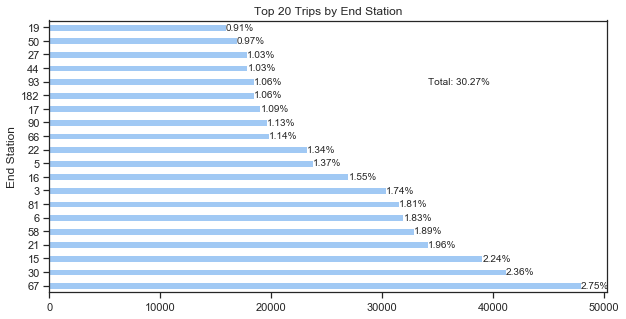

In [673]:
toptrips_by_end = df_2018.groupby(['end_station_id']).count().bike_id.sort_values(ascending = True).nlargest(20)
toptrips_by_end.plot(kind = 'barh', figsize = [10, 5], color = basecolor)
toptrips_by_end = toptrips_by_end.reset_index()
plt.ylabel('End Station')
plt.title('Top 20 Trips by End Station');
for i in range(len(toptrips_by_end)):
    text = "{:.2%}".format(toptrips_by_end.loc[i, 'bike_id']/len(df_2018))
    plt.text(toptrips_by_end.loc[i, 'bike_id'] + 1, i, text, va = 'center')
plt.text(toptrips_by_end.loc[3, 'bike_id'] + 1, 15, "Total: " + "{:.2%}".format(toptrips_by_end.bike_id.sum()/len(df_2018)), va = 'center');
    

> Top 20 trips by end station accounts for 30.27% of total trips.

In [674]:
topstart_set = set(toptrips_by_start.start_station_id.tolist())
topend_set = set(toptrips_by_end.end_station_id.tolist())
topcommonstation_set = topstart_set & topend_set

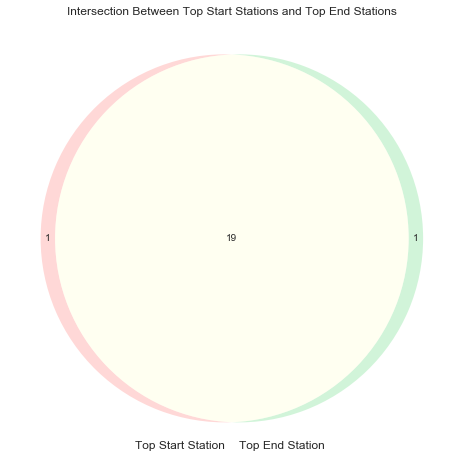

In [675]:
from matplotlib_venn import venn2, venn2_circles
plt.figure(figsize = (12, 8))
venn2([topstart_set, topend_set], set_labels = ('Top Start Station', 'Top End Station'))
plt.title('Intersection Between Top Start Stations and Top End Stations');

> 19 stations fall into both 'top 20 start stations' and 'top 20 end stations'

> None of the above definitions for 'a trip' is good:
1. By defining a trip as a pair of start and end station: top 20 trips only account for 3.55% of total trips !
2. By defining a trip by either start station or end station: well, in reality, any trip plan has 'from' and 'to' ! 

> A Start Station in one trip could be the End Station in another trip, and hence it may make more sense to find out **what stations are the busiest ones, i.e., which stations have the most traffic**. 

In [676]:
# traffic by start station (i.e. bike pickup)
start_count = df_2018.groupby('start_station_id').count().bike_id.reset_index().rename(index = str, columns = {"start_station_id":"station_id", "bike_id":"count"})
start_count.head()

,station_id,count
0,3,28784
1,4,5144
2,5,22846
3,6,28379
4,7,8240


In [677]:
# traffic by end station (i.e., bike return)
end_count = df_2018.groupby('end_station_id').count().bike_id.reset_index().rename(index = str, columns = {"end_station_id":"station_id", "bike_id":"count"})
end_count.head()

,station_id,count
0,3,30330
1,4,5178
2,5,23811
3,6,31944
4,7,8153


In [678]:
# traffic by station (i.e., bike pickup and return)
station_count = (start_count.set_index(['station_id']) + end_count.set_index(['station_id'])).reset_index()
station_count.head()

,station_id,count
0,3,59114
1,4,10322
2,5,46657
3,6,60323
4,7,16393


Text(0.5, 1.0, '20 Busiest Stations')

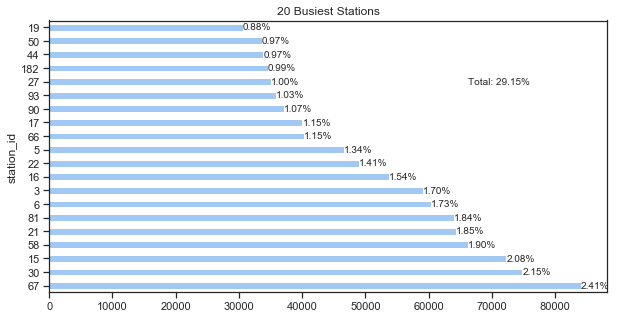

In [679]:
toptrips_by_station = station_count.sort_values(by = 'count', ascending = False).nlargest(columns = ['count'], n = 20)
toptrips_by_station = toptrips_by_station.reset_index()
toptrips_by_station.drop(['index'], axis = 1, inplace = True)
toptrips_by_station.plot(kind = 'barh', x = 'station_id', y = 'count', color = basecolor, figsize = [10, 5], legend = None)
for i in range(len(toptrips_by_station)):
    text = "{:.2%}".format(toptrips_by_station.loc[i, 'count']/(len(df_2018)*2))
    plt.text(toptrips_by_station.loc[i, 'count'] + 1, i, text, va = 'center')
plt.text(toptrips_by_station.loc[3, 'count'] + 1, 15, "Total: " + "{:.2%}".format(toptrips_by_station.loc[:,'count'].sum()/(len(df_2018)*2)), va = 'center');
plt.title('20 Busiest Stations')

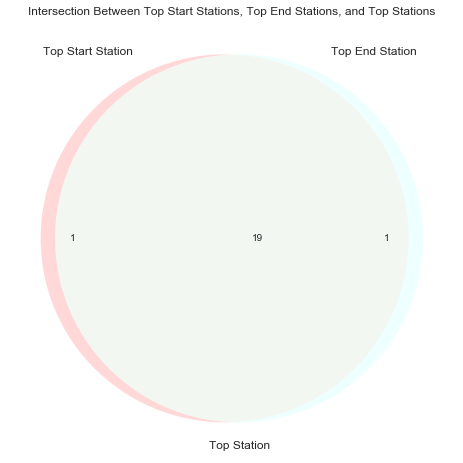

In [680]:
from matplotlib_venn import venn3, venn3_circles
topstation_set = set(toptrips_by_station.station_id.tolist())
plt.figure(figsize = (12, 8))
venn3([topstart_set, topend_set, topstation_set], set_labels = ('Top Start Station', 'Top End Station', 'Top Station'))
plt.title('Intersection Between Top Start Stations, Top End Stations, and Top Stations');

> We can see that on entire dataset, 'top 20 stations' has a large degree of overlap with 'top 20 start stations' and 'top 20 end stations'. Actually, 'top 20 stations' overlap with 'top 20 end stations' completely. 

> Will the above observation hold true across different type of users (i.e, Subscriber vs Customer)?

### What Demographics of Ford GoBike's Users Look Like ?

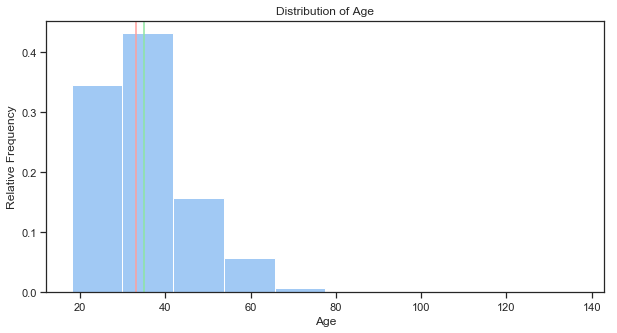

In [681]:
# By age
age_min = (2018 - df_2018.user_birth_year).min()
age_max = (2018 - df_2018.user_birth_year).max()
age_mean =  (2018 - df_2018.user_birth_year).mean()
age_median =  (2018 - df_2018.user_birth_year).median()
xbins = np.arange(age_min, age_max + 10, 10)
(2018 - df_2018.user_birth_year).plot(kind = 'hist', weights = np.zeros_like(df_2018.user_birth_year) + 1/df_2018.user_birth_year.size, figsize = [10, 5], grid = False)
plt.xlabel('Age')
plt.ylabel('Relative Frequency')
plt.title('Distribution of Age')
plt.axvline(age_mean, color = 'g', label = 'mean')
plt.axvline(age_median, color = 'r', label = 'median')

> About 80% users are between 18 and 40 years old

In [682]:
# How many users are older than 100 and how old ?
print((2018 - df_2018.user_birth_year > 100).sum())
(2018 - df_2018[2018 - df_2018.user_birth_year > 100].user_birth_year).value_counts().sort_index()

1160


104     18
107    262
109      4
112      2
114     12
115      1
116    169
117     29
118    632
129      3
130     23
137      5
Name: user_birth_year, dtype: int64

> Hmm ... I can't say that there is no possibility that people can live up to 137 years old and ride bike at age of 137 ... I hope I can ride bike at age 137!

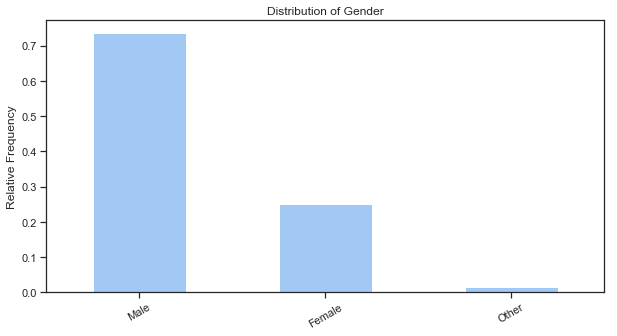

In [683]:
# By gender
(df_2018.user_gender.value_counts()/len(df_2018)).plot(kind = 'bar', figsize = [10, 5], rot = 30, color = basecolor)
plt.ylabel('Relative Frequency')
plt.title('Distribution of Gender');

> About 73.5% users are male, 25% are female, and 1.5% are other.

Text(0.5, 1.0, 'Distribution of User Type')

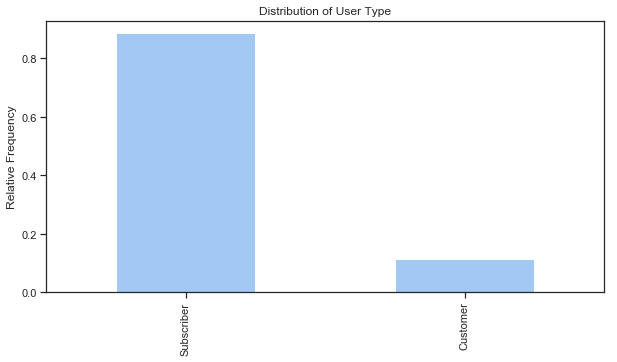

In [684]:
# By type of user
(df_2018.user_type.value_counts()/len(df_2018)).plot(kind = 'bar', figsize = [10, 5], color = basecolor)
plt.ylabel('Relative Frequency')
plt.title('Distribution of User Type')

> About 89% users are subscribers

> As of now, the demographics of Ford GoBike's users is explored in terms of age, gender and type separately. Later on I'll explore the distribution of age across gender and user type.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Unusual points are found in duration_sec and user_age which can be derived by *2018 - user_birth_year*. Most of trips are within 60 minutes with the maximum of around 24 hours. Most of users are between 18 and 80 years old with total of 1160 users older than 100 and the oldest of 137 ... I can't say those values are outliers because they are possible values ... IMO - No transofrmation is needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distribution is found. Data wrangling was applied as follows
1. Drop columns which I am not interested in or don't help addressing my questions.
2. Drop rows which contain at least one NA.
3. Convert start_time and end_time to datetime to facilitate the analysis in terms of time, for example, variations of users' activity level by time.
4. Convert start_station_id and end_station_id to integer.
5. Convert user_type and member_gender to categorical variables.
6. Rename columns of member_birth_year and member_gender to user_birth_year and user_gender. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Trip Duration by Type of User

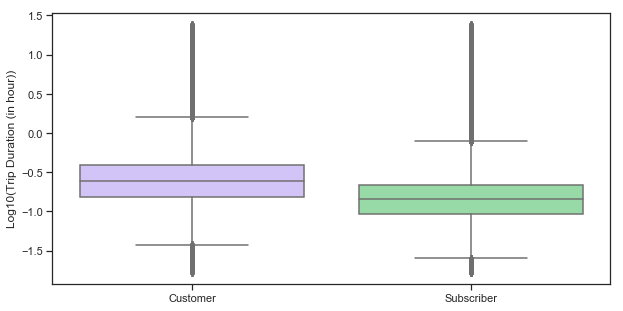

In [685]:
# boxplot
plt.figure(figsize = [10, 5])
sb.boxplot(data = df_2018, x = 'user_type' , y = np.log10(df_2018.duration_sec/3600), palette = ["m", "g"])
plt.xlabel("")
plt.ylabel("Log10(Trip Duration (in hour))");

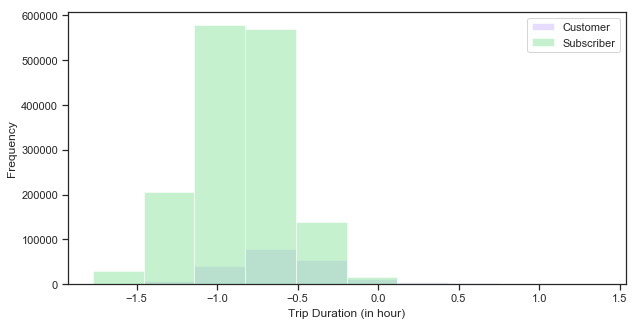

In [686]:
# hist
plt.figure(figsize = [10, 5])
plt.hist(np.log10(df_2018[df_2018.user_type == 'Customer'].duration_sec/3600), alpha = 0.5, label = 'Customer', color = 'm')
plt.hist(np.log10(df_2018[df_2018.user_type == 'Subscriber'].duration_sec/3600), alpha = 0.5, label = 'Subscriber', color = 'g')
plt.ylabel('Frequency')
plt.xlabel('Trip Duration (in hour)')
plt.legend();

> The trip druation of the Customer group is longer than the Subsciber group while both follow the same pattern. 

### Trip Duration by Gender

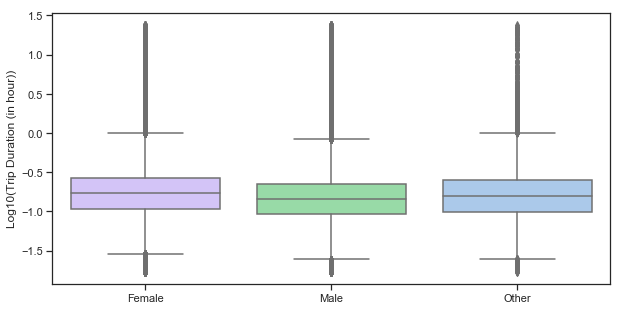

In [687]:
# boxplot
plt.figure(figsize = [10, 5])
sb.boxplot(data = df_2018, x = 'user_gender' , y = np.log10(df_2018.duration_sec/3600), palette = ["m", "g", "b"])
plt.xlabel("")
plt.ylabel("Log10(Trip Duration (in hour))");

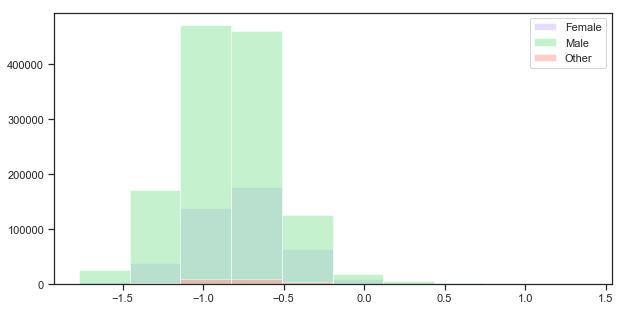

In [688]:
# hist
plt.figure(figsize = [10, 5])
plt.hist(np.log10(df_2018[df_2018.user_gender == 'Female'].duration_sec/3600), alpha = 0.5, label = 'Female', color = 'm', stacked = True)
plt.hist(np.log10(df_2018[df_2018.user_gender == 'Male'].duration_sec/3600), alpha = 0.5, label = 'Male', color = 'g', stacked = True)
plt.hist(np.log10(df_2018[df_2018.user_gender == 'Other'].duration_sec/3600), alpha = 0.5, label = 'Other', color = 'r')     
plt.legend();

> The trip druation of the Female group and the Other group is merely slightly longer than the Male while all three follow the same pattern.

### Average Trip Duration by Age

In [689]:
(2018 - df_2018.user_birth_year).min(), (2018 - df_2018.user_birth_year).max()

(18, 137)

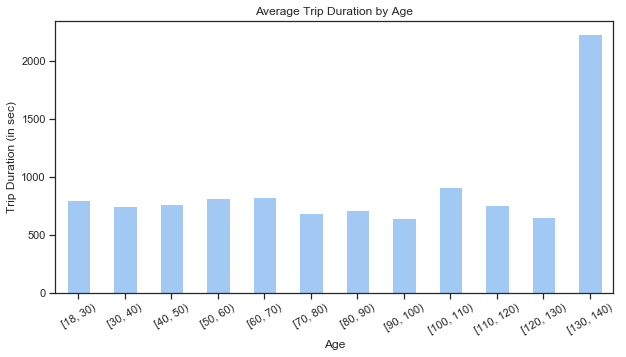

In [690]:
df_2018['age_bin'] = pd.cut(2018 - df_2018.user_birth_year, [18, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140], right = False)
df_2018.groupby('age_bin').duration_sec.mean().plot(kind = 'bar', color = basecolor, figsize = [10, 5], rot = 30)
plt.xlabel('Age')
plt.ylabel('Trip Duration (in sec)')
plt.title('Average Trip Duration by Age');

In [691]:
(2018 - df_2018.user_birth_year >= 130).sum()

28

> The average trip druation for the age group of [130, 140) is way much longer than other groups. Let's check boxplot.

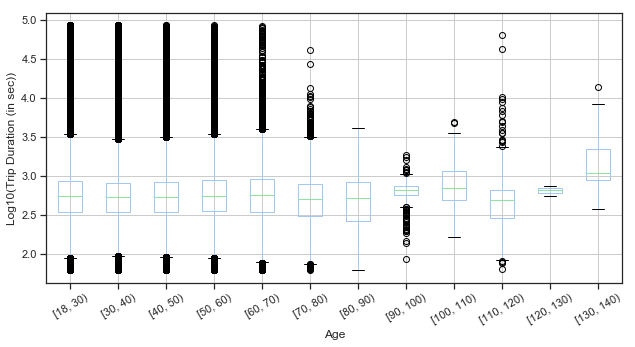

In [692]:
df_2018['duration_sec_log'] = np.log10(df_2018.duration_sec)
df_2018.boxplot(column = 'duration_sec_log', by = 'age_bin', rot = 30, figsize = [10, 5])
plt.ylabel('Log10(Trip Duration (in sec))')
plt.xlabel('Age')
plt.suptitle('')
plt.title('');

> I see that the five-number summary is pretty close for users yonger than 70-year-old.

### Top Stations by Type of User

In [693]:
# start station
start_usertype_count = df_2018.groupby(['user_type', 'start_station_id']).count().bike_id.sort_values(ascending = False)
start_usertype_count = start_usertype_count.reset_index()
start_usertype_count.rename(index = str, columns = {"bike_id" : "count"}, inplace = True)
# top start stations for customer
topstart_customer_set = set(start_usertype_count[start_usertype_count.user_type == 'Customer'].sort_values(by = 'count', ascending = False).nlargest(columns = 'count', n = 20).start_station_id.tolist())
# top start stations for subscriber
topstart_subscriber_set = set(start_usertype_count[start_usertype_count.user_type == 'Subscriber'].sort_values(by = 'count', ascending = False).nlargest(columns = 'count', n = 20).start_station_id.tolist())

In [694]:
# end Station
end_usertype_count = df_2018.groupby(['user_type', 'end_station_id']).count().bike_id.sort_values(ascending = False)
end_usertype_count = end_usertype_count.reset_index()
end_usertype_count.rename(index = str, columns = {"bike_id" : "count"}, inplace = True)
# top end stations for customer
topend_customer_set = set(end_usertype_count[end_usertype_count.user_type == 'Customer'].sort_values(by = 'count', ascending = False).nlargest(columns = 'count', n = 20).end_station_id.tolist())
# top end stations for subscriber
topend_subscriber_set = set(end_usertype_count[end_usertype_count.user_type == 'Subscriber'].sort_values(by = 'count', ascending = False).nlargest(columns = 'count', n = 20).end_station_id.tolist())

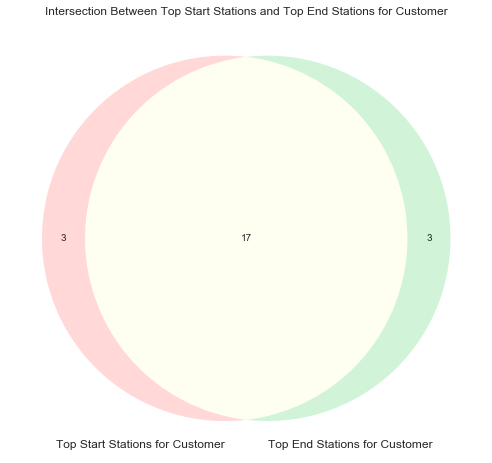

In [695]:
# Intersection between top start stations and top end stations for customer
plt.figure(figsize = (12, 8))
venn2([topstart_customer_set, topend_customer_set], set_labels = ('Top Start Stations for Customer', 'Top End Stations for Customer'));
plt.title('Intersection Between Top Start Stations and Top End Stations for Customer');

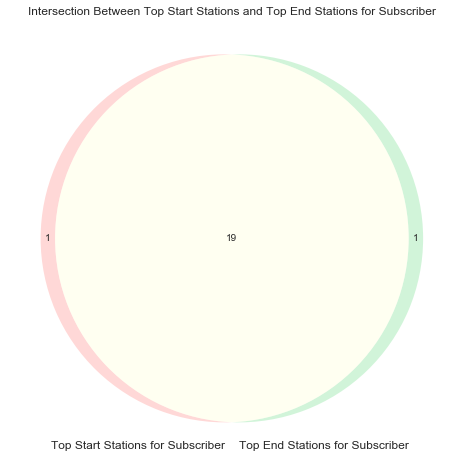

In [696]:
# intersection between top start stations and top end stations for subscriber
plt.figure(figsize = (12, 8))
venn2([topstart_subscriber_set, topend_subscriber_set], set_labels = ('Top Start Stations for Subscriber', 'Top End Stations for Subscriber'));
plt.title('Intersection Between Top Start Stations and Top End Stations for Subscriber');

> The Subscriber group has greater overlap between top start stations and top end stations than the Customer group (19 versus 17) - it follows the pattern on the entire dataset more closely.

### User activity level trend during a day (customer vs subscriber)

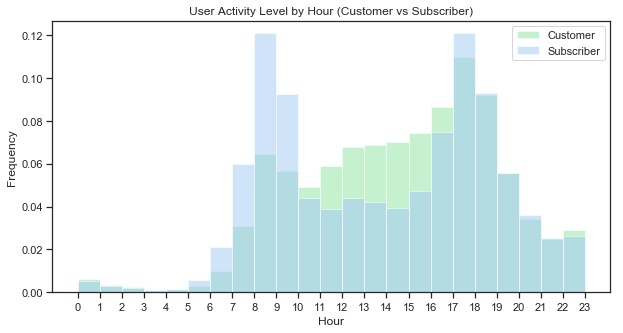

In [697]:
bins = np.arange(0, 24, 1)
df_2018[df_2018.user_type == 'Customer'].start_time.dt.hour.plot(kind = 'hist', alpha = 0.5, weights = np.zeros_like(df_2018[df_2018.user_type == 'Customer'].duration_sec) + 1/(df_2018.user_type == 'Customer').sum(), figsize = [10, 5], bins = bins, grid = False, edgecolor = 'white', color = 'g', label = 'Customer')
df_2018[df_2018.user_type == 'Subscriber'].start_time.dt.hour.plot(kind = 'hist', alpha = 0.5, weights = np.zeros_like(df_2018[df_2018.user_type == 'Subscriber'].duration_sec) + 1/(df_2018.user_type == 'Subscriber').sum(), figsize = [10, 5], bins = bins, grid = False, edgecolor = 'white', color = 'b', label = 'Subscriber')
plt.xlabel('Hour')
plt.xticks(bins);
plt.ylabel('Frequency')
plt.title('User Activity Level by Hour (Customer vs Subscriber)');
plt.legend()

> The Subscriber group follows the pattern on the entire dataset very closely: users are most active in 8:00 - 9:00, 17:00 - 18:00, followed by 9:00AM - 10:00AM, 18:00 - 19:00, and then 16:00 - 17:00. On the other hand, the Customer group's activity picks up around 11:00 and reached to the peak around 17:00.

### User activity level trend during a week (customer vs subscriber)

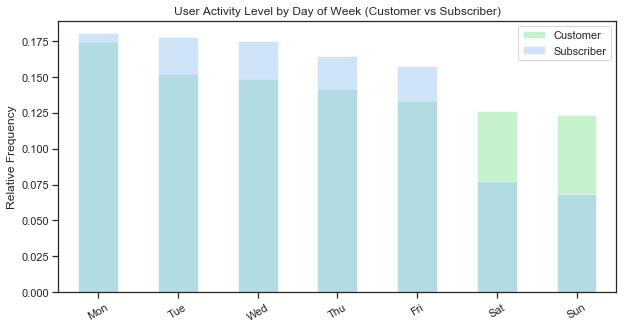

In [698]:
(df_2018[df_2018.user_type == 'Customer'].start_time.dt.dayofweek.value_counts()/(df_2018.user_type == 'Customer').sum()).plot(kind = 'bar', alpha = 0.5, figsize = [10, 5], rot = 30, label = 'Customer', color = 'g')
(df_2018[df_2018.user_type == 'Subscriber'].start_time.dt.dayofweek.value_counts()/(df_2018.user_type == 'Subscriber').sum()).plot(kind = 'bar', alpha = 0.5, figsize = [10, 5], rot = 30, label = 'Subscriber', color = 'b')
locs, labels = plt.xticks()   
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(locs, labels)
plt.ylabel('Relative Frequency')
plt.title('User Activity Level by Day of Week (Customer vs Subscriber)');
plt.legend()

> Again, the Subscriber group follows the pattern on the entire dataset more closely. Over weekends, the Customer group is much more active than the Subscriber group.

### User activity level trend across months (customer vs subscriber)

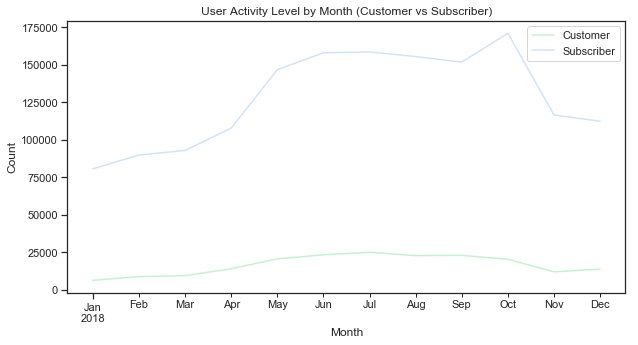

In [699]:
df_2018[df_2018.user_type == 'Customer'].groupby(df_2018[df_2018.user_type == 'Customer'].start_time.dt.to_period('M')).agg('count')['bike_id'].plot(kind = 'line', alpha = 0.5, color = 'g', label = 'Customer', figsize = [10, 5])
df_2018[df_2018.user_type == 'Subscriber'].groupby(df_2018[df_2018.user_type == 'Subscriber'].start_time.dt.to_period('M')).agg('count')['bike_id'].plot(kind = 'line', alpha = 0.5, color = 'b', label = 'Subscriber', figsize = [10, 5])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('User Activity Level by Month (Customer vs Subscriber)')
plt.legend()

> Once again, the Subscriber group follows the pattern on the entire dataset tightly while the Customer group's activity level is much smoothier. Actually, there is a slight increase starting from Nov through Dec in the Customer group.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The trip duration, the most taken trips (or the busiest stations) and the user activity level variation are analyzed across different types of users: Customer and Subscriber. Apparently, the Subscriber group follows the pattern on the entire dataset very closely. After all, the Subscriber group counts for up to 89% of the dataset. The Customer group kind of smoothes the overall user activity, especially in the granularity of hour.     

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I see that the Customer group is much more active than the Subscriber group over weekends and from 11:00 to 16:00. Plus, the activity of the Customer group trends up after 10:00 and reaches the peark at 17:00.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Get a complete picture of demographics 

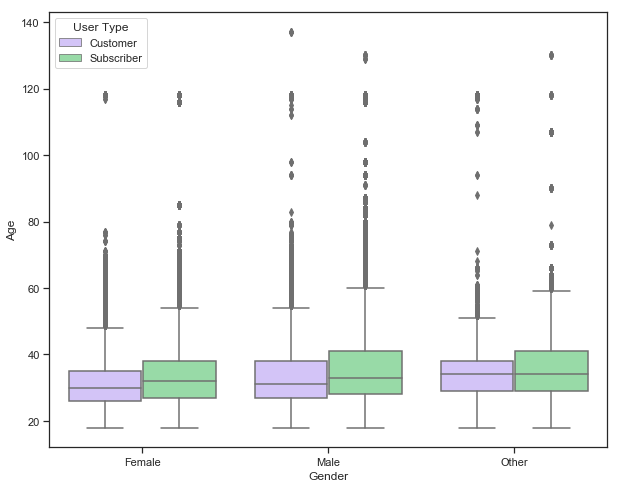

In [700]:
sb.set(style = "ticks", palette = "pastel")
plt.figure(figsize = [10, 8])
sb.boxplot(data = df_2018, x = 'user_gender' , y = 2018 - df_2018.user_birth_year, hue = 'user_type', palette = ["m", "g"])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.gca().legend().set_title('User Type')


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> A complete picture of demographics is retrieved here
1. Subscribers are more spread in age than customers across all genders (female, male and other). 
2. Median age across all groups are pretty close, between 30 - 33. 
3. The group of *male customer* has the most outliers the biggest extreme values.


### Were there any interesting or surprising interactions between features?

> Interestingly, no female user in this dataset is older than 130 - it is said that usally female lives longer than male ...